In [62]:
from Demo.montecarlo import Die, Game, Analyzer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(5100)

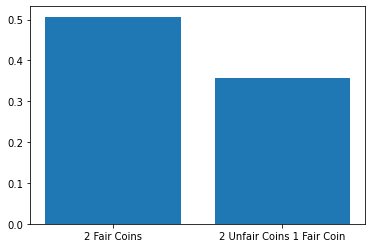

In [63]:
fcoin = Die(np.array(['H', 'T']))
ucoin = Die(np.array(['H', 'T']))
ucoin.change_weight('H', 5)

gameff = Game([fcoin, fcoin])
gameff.play(1000)

gameuuf = Game([ucoin, ucoin, fcoin])
gameuuf.play(1000)

numjackff = Analyzer(gameff).jackpot()
numjackuuf = Analyzer(gameuuf).jackpot()

reljackff = numjackff/1000
reljackuuf = numjackuuf/1000

plot1 = plt.bar(x = ['2 Fair Coins','2 Unfair Coins 1 Fair Coin'], height = [reljackff,reljackuuf])
plt.show()

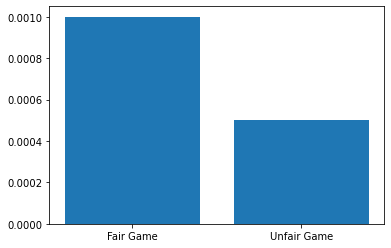

In [64]:
d= Die(np.array([1, 2, 3, 4, 5, 6]))

ud1 = Die(np.array([1, 2, 3, 4, 5, 6]))
ud1.change_weight(6, 5)

ud2 = Die(np.array([1, 2, 3, 4, 5, 6]))
ud2.change_weight(1, 5)

gamefffff = Game([d, d, d, d, d])
gamefffff.play(10000)

gameuufff = Game([ud1, ud2, d, d, d])
gameuufff.play(10000)

numjackfffff = Analyzer(gamefffff).jackpot()
numjackuufff = Analyzer(gameuufff).jackpot()

reljackfffff = numjackfffff / 10000
reljackuufff = numjackuufff / 10000

plt.bar(x=['Fair Game', 'Unfair Game'], height=[reljackfffff, reljackuufff])
plt.show()

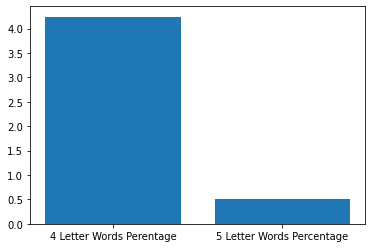

In [65]:
letterdf = pd.read_csv("data/english_letters.txt", sep=' ', header=None, names=['Letters', 'Frequencies'])
with open("data/scrabble_words.txt", 'r') as file:
    scrabblewords = set(file.read().split())

ld = Die(np.array(list(letterdf["Letters"])))
freqs = np.array(list(letterdf["Frequencies"]))

for index, row in letterdf.iterrows():
    ld.change_weight(row['Letters'], row['Frequencies'])
    
game4l = Game([ld, ld, ld, ld])
game4l.play(1000)

numperms4l = Analyzer(game4l).permutation_counts()

wordmatch4l = sum(word in scrabblewords for word in numperms4l.index)

game5l = Game([ld, ld, ld, ld, ld])
game5l.play(1000)

numperms5l = Analyzer(game5l).permutation_counts()

wordmatch5l = sum(word in scrabblewords for word in numperms5l.index)

perc4 = (wordmatch4l / len(numperms4l)) * 100
perc5 = (wordmatch5l / len(numperms5l)) * 100

plt.bar(x=['4 Letter Words Perentage', '5 Letter Words Percentage'], height=[perc4, perc5])
plt.show()